In [1]:
import os
import numpy as np
from langchain_mistralai import MistralAIEmbeddings
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_core.documents import Document

In [2]:
from cemantix_helpers import calculate_cosine_similarity
from cemantix_helpers import get_embedding_vector
from cemantix_helpers import calculate_relative_position
from cemantix_helpers import plot_scores

In [3]:
api_key = os.environ["MISTRAL_API_KEY"]
embeddings = MistralAIEmbeddings(model="mistral-embed")

/media/guillaume/DATA/NERD/GitHub/cemantix/.venv/lib/python3.10/site-packages/langchain_mistralai/embeddings.py:186: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


In [4]:
vector_store = InMemoryVectorStore(embedding=embeddings)

In [5]:
with open("10000_french_words.txt") as fid:
  total_corpus = [line.strip() for line in fid.readlines()]
total_corpus_size = len(total_corpus)

In [6]:
corpus_size = 250

In [7]:
randomized_indices = np.random.permutation(total_corpus_size)
documents = []
ids = []
for index in range(corpus_size -1):
    randomized_index = randomized_indices[index]
    documents.append(Document(page_content=total_corpus[randomized_index]))
    ids.append(str(randomized_index))

In [8]:
vector_store.add_documents(documents=documents, ids=ids);

In [9]:
target = input("Target?")

Target? Moustique


In [10]:
target_vector = get_embedding_vector(word=target, embeddings=embeddings)
vector_store.add_documents(documents=[Document(page_content=target)], ids=[str(corpus_size)]);

In [11]:
vs = vector_store.similarity_search_with_score(query=target, k=corpus_size)

In [12]:
corpus_scores = np.zeros(corpus_size)
corpus = []
print("{:<8} | {:<18} | {}".format("Ranking", "Cosine similarity", "Word"))
print("{:<8} | {:<18} | {}".format("-"*8, "-"*18, "-"*28))
for i, answer in enumerate(vs):
    corpus_scores[i] = answer[1]
    corpus.append(answer[0].page_content)
    print("{:<8} | {:<18.3f} | {}".format(i +1, answer[1], answer[0].page_content))

Ranking  | Cosine similarity  | Word
-------- | ------------------ | ----------------------------
1        | 1.000              | Moustique
2        | 0.722              | perroquet
3        | 0.717              | mausolée
4        | 0.710              | atomique
5        | 0.703              | hôte
6        | 0.694              | âpre
7        | 0.693              | repoussant
8        | 0.689              | miteux
9        | 0.689              | moineau
10       | 0.688              | diabolique
11       | 0.687              | chéquier
12       | 0.686              | joueur
13       | 0.686              | boucan
14       | 0.685              | approximativement
15       | 0.685              | médiatique
16       | 0.684              | entraîné
17       | 0.683              | somnifère
18       | 0.683              | pantoufle
19       | 0.682              | bicyclette
20       | 0.682              | cosmique
21       | 0.681              | neurologique
22       | 0.681              |

Query? Pince


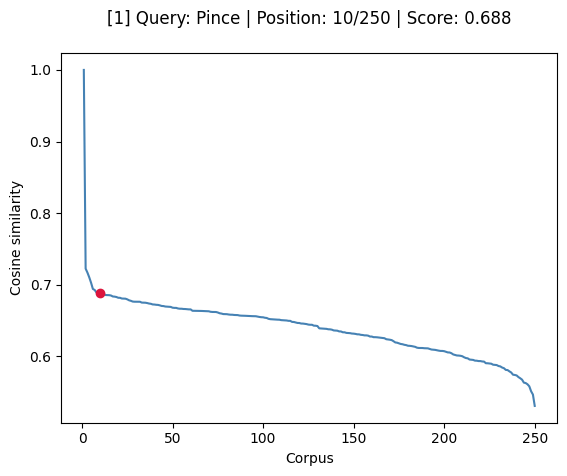

[1] Query: Pince | Position: 10/250 | Score: 0.688



Query? Casque


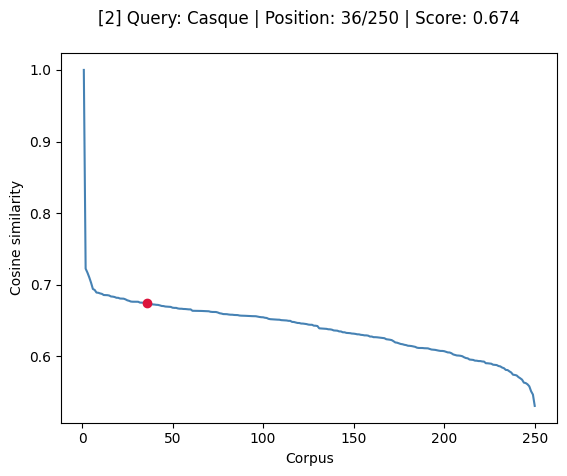

[2] Query: Casque | Position: 36/250 | Score: 0.674



Query? Piqure


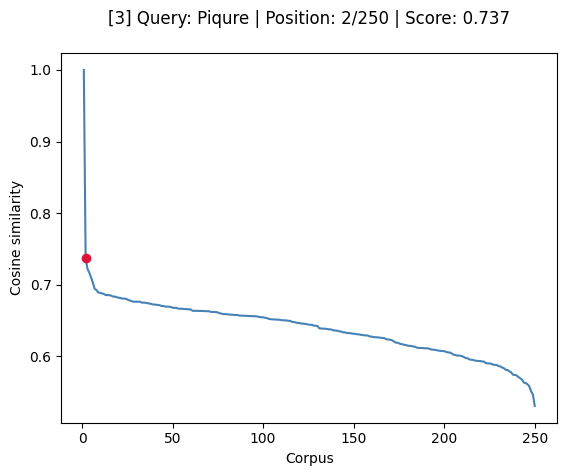

[3] Query: Piqure | Position: 2/250 | Score: 0.737



Query? Insecte


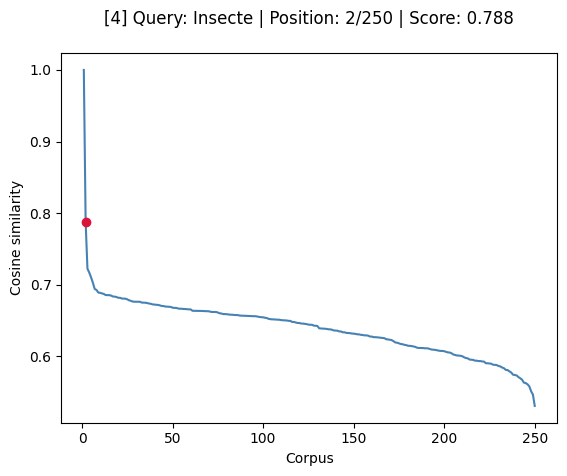

[4] Query: Insecte | Position: 2/250 | Score: 0.788



Query? Voler


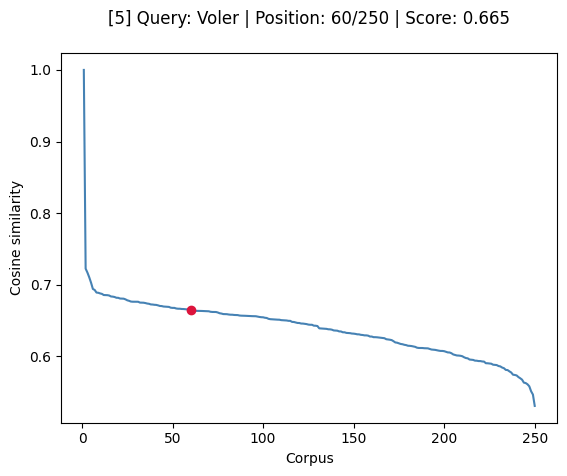

[5] Query: Voler | Position: 60/250 | Score: 0.665



Query? Cinéma


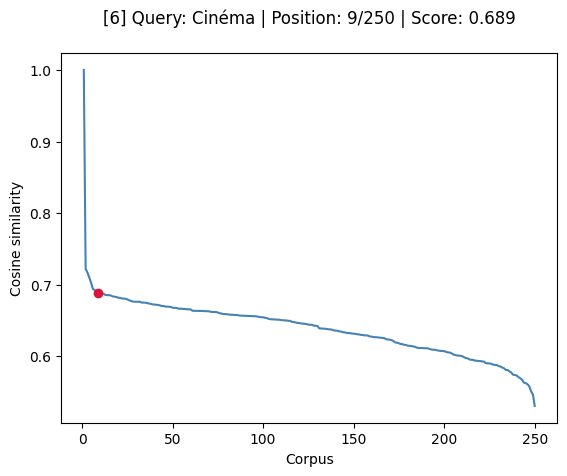

[6] Query: Cinéma | Position: 9/250 | Score: 0.689



Query? Enervant


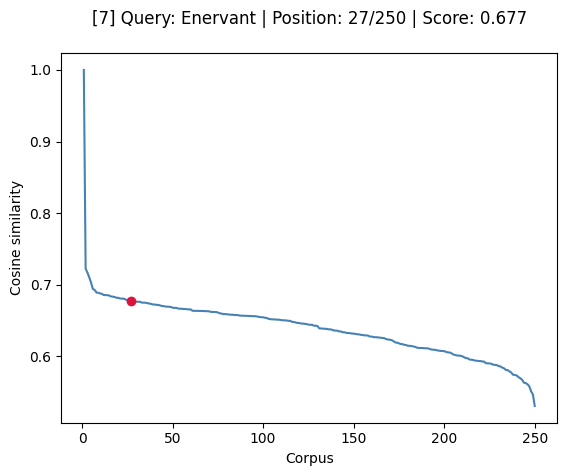

[7] Query: Enervant | Position: 27/250 | Score: 0.677



Query? Nuisible


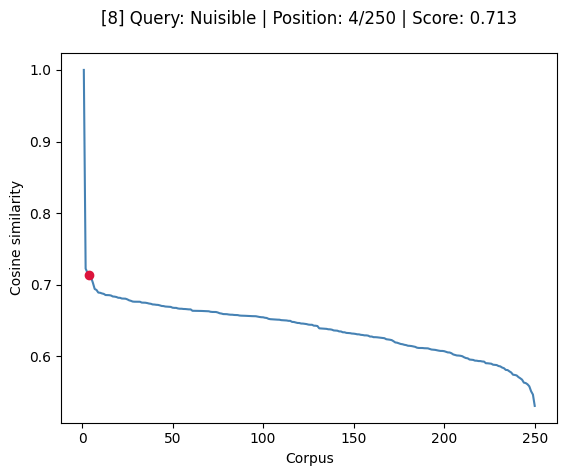

[8] Query: Nuisible | Position: 4/250 | Score: 0.713



Query? Caverne


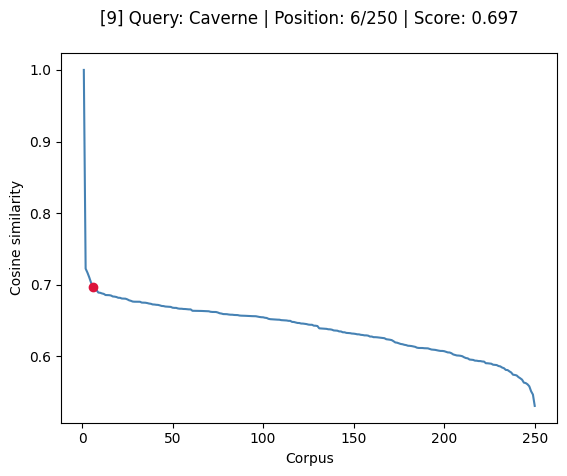

[9] Query: Caverne | Position: 6/250 | Score: 0.697



Query? Karaoké


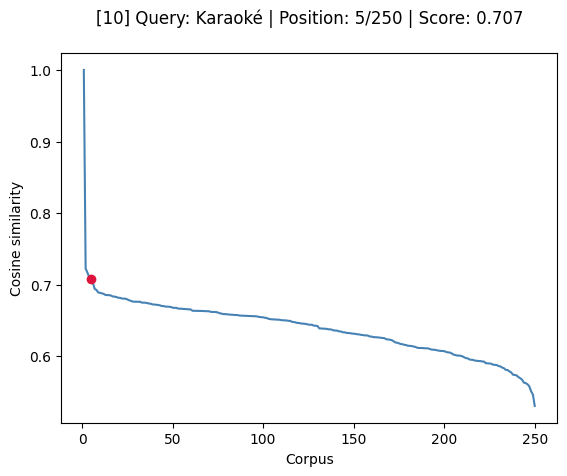

[10] Query: Karaoké | Position: 5/250 | Score: 0.707



Query? Baleine


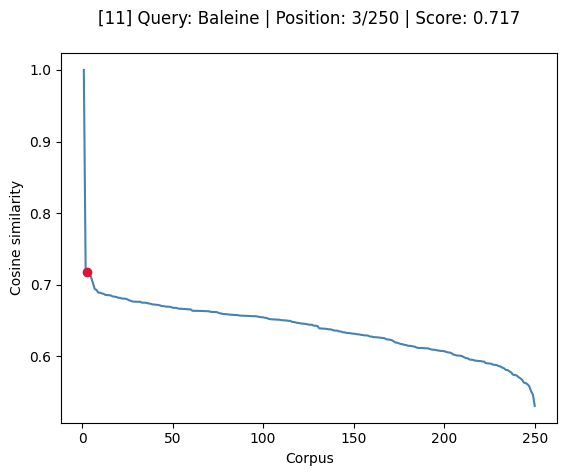

[11] Query: Baleine | Position: 3/250 | Score: 0.717



Query? Canapé


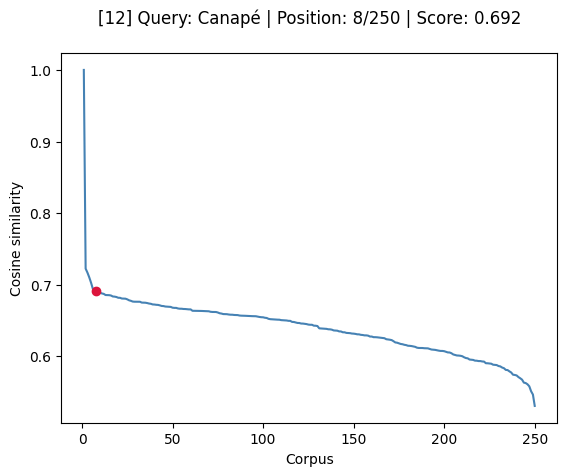

[12] Query: Canapé | Position: 8/250 | Score: 0.692



Query? Professeur


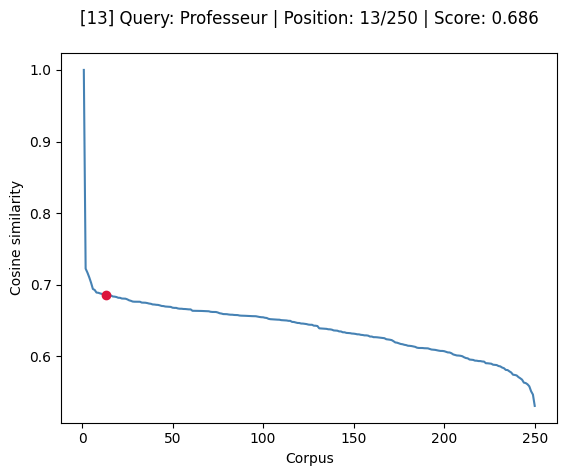

[13] Query: Professeur | Position: 13/250 | Score: 0.686



Query? Riz


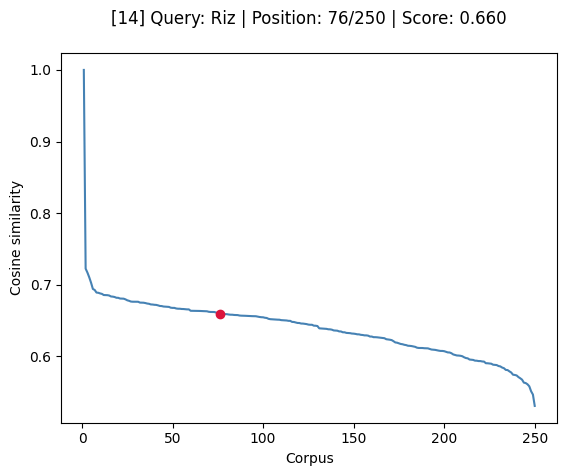

[14] Query: Riz | Position: 76/250 | Score: 0.660



Query? Opéra


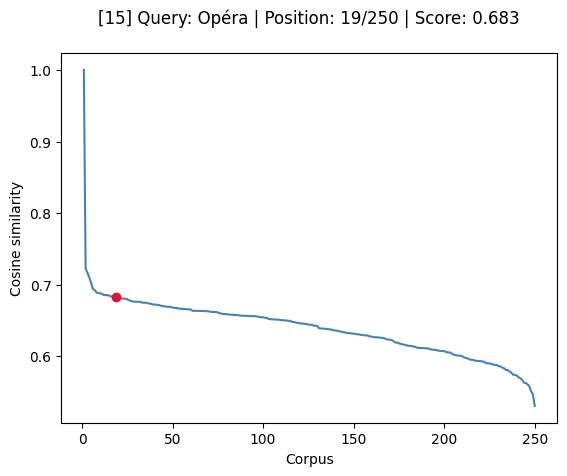

[15] Query: Opéra | Position: 19/250 | Score: 0.683



Query? Dictateur


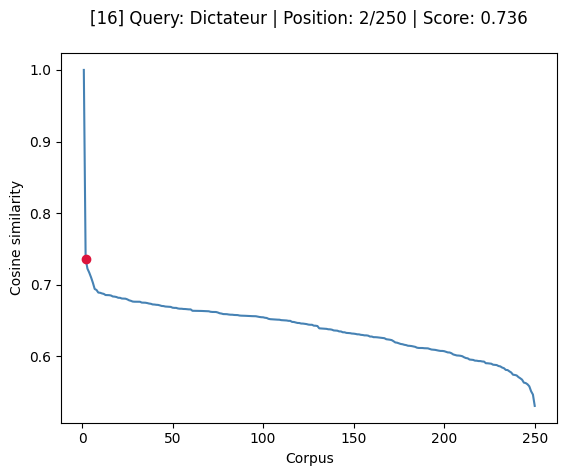

[16] Query: Dictateur | Position: 2/250 | Score: 0.736



Query? Troll


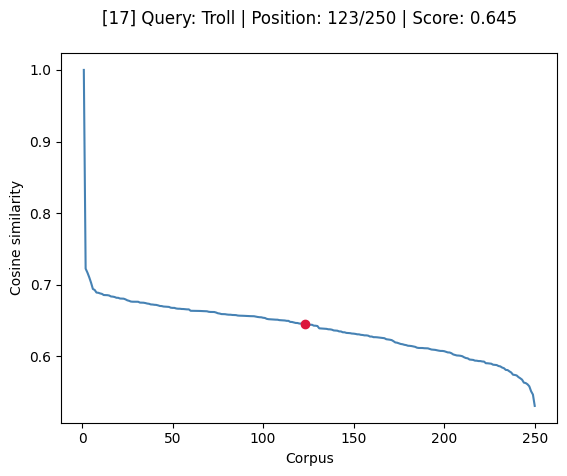

[17] Query: Troll | Position: 123/250 | Score: 0.645



Query? Papier


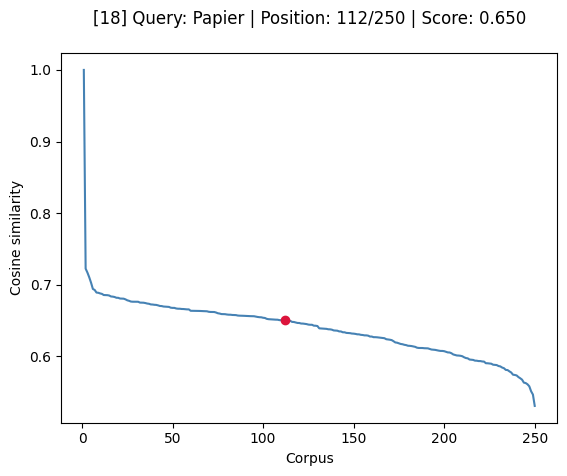

[18] Query: Papier | Position: 112/250 | Score: 0.650



In [ ]:
position = corpus_size
number_of_attempts = 0
while position > 1:
    query = input("Query?")
    number_of_attempts +=1
    query_vector = get_embedding_vector(word=query, embeddings=embeddings)
    candidate_score = calculate_cosine_similarity(a=query_vector, b=target_vector)
    position = calculate_relative_position(corpus_scores=corpus_scores, candidate_score=candidate_score)
    plot_scores(corpus_scores, candidate_score, position, query, corpus, number_of_attempts, corpus_size)    

In [ ]:
# ok pas mal.